In [3]:
import pyvista as pv
import numpy as np

filename = 'CaseRZ_FlowCylinder3D_out/particles/PartFluid_0090.vtk'
mesh = pv.read(filename)

# note that we have 6 Data Arrays
mesh


PolyData (0x7f29eebe3a60)
  N Cells:	20019
  N Points:	20019
  X Bounds:	-1.049e+00, 1.029e+00
  Y Bounds:	-9.907e-01, 9.746e-01
  Z Bounds:	-9.975e-01, 1.148e+00
  N Arrays:	6

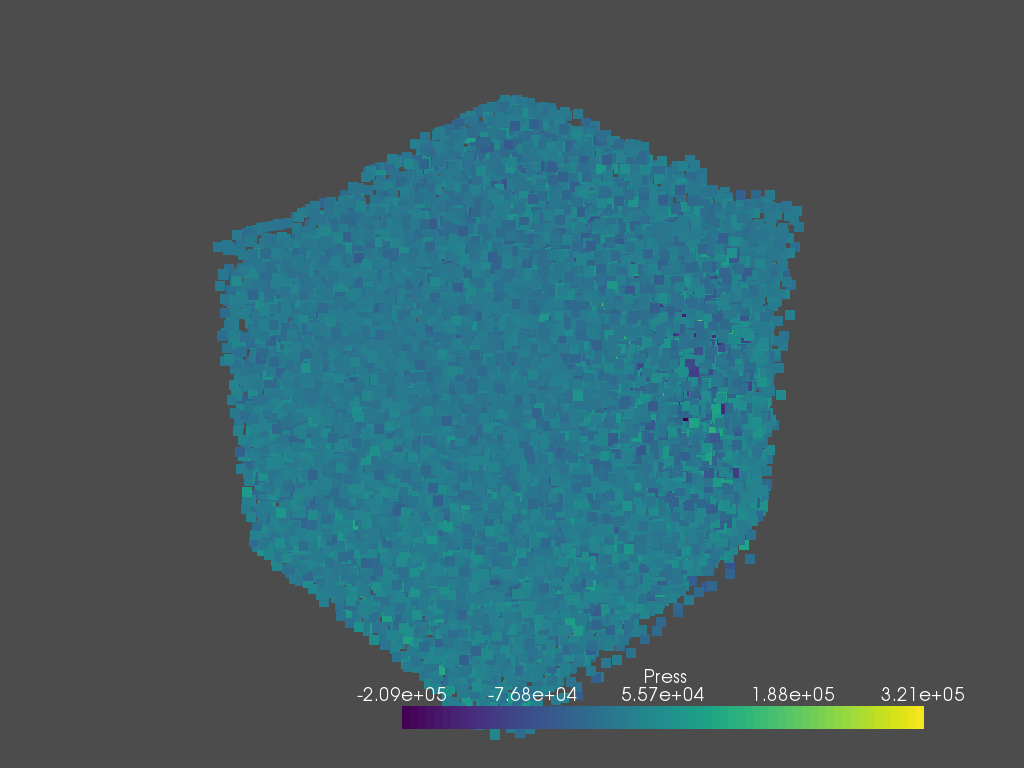

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [4]:
mesh.set_active_scalars('Press')
mesh.plot(point_size=10)

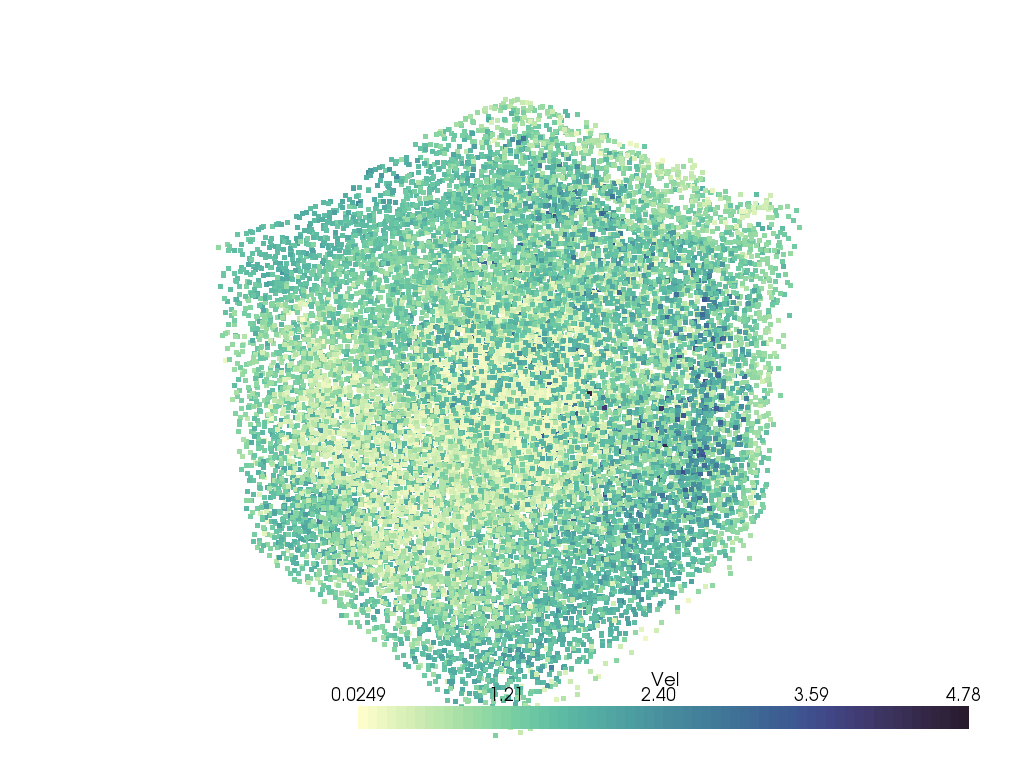

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [246]:
# mesh.plot(point_size=10)
import matplotlib.pyplot as plt


# pl = pv.PlotterITK()

# the below does not seem to be the right way to set for plotting
mesh.set_active_scalars('Vel')


boring_cmap = plt.cm.get_cmap("cmo.deep", 255)

mesh.plot(cmap=boring_cmap)



pl = pv.PlotterITK()

#plotting Press to a scalar(s) doesn't work either
pl.add_mesh(mesh)
# pl.show(True)

In [32]:
sized = mesh.compute_cell_sizes()
cell_volumes = sized.cell_arrays["Volume"]
volume = mesh.volume

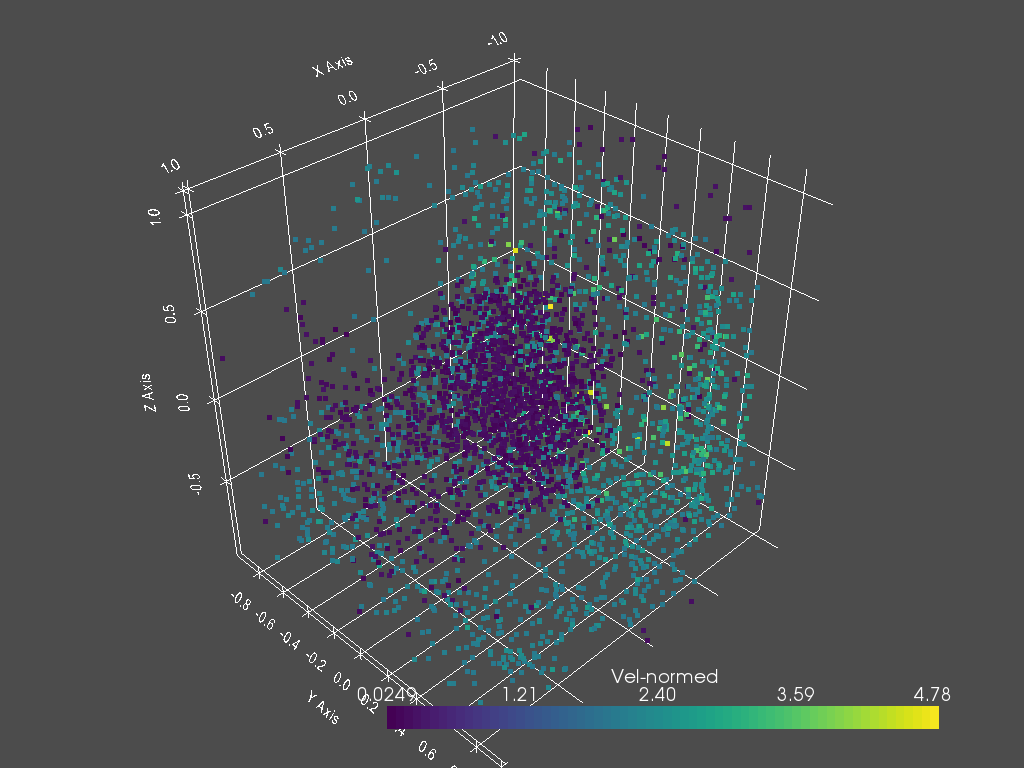

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [48]:
threshed = mesh.threshold_percent([0.05, 0.40], invert=True)
threshed.plot(show_grid=True, cpos=[1,1,1])

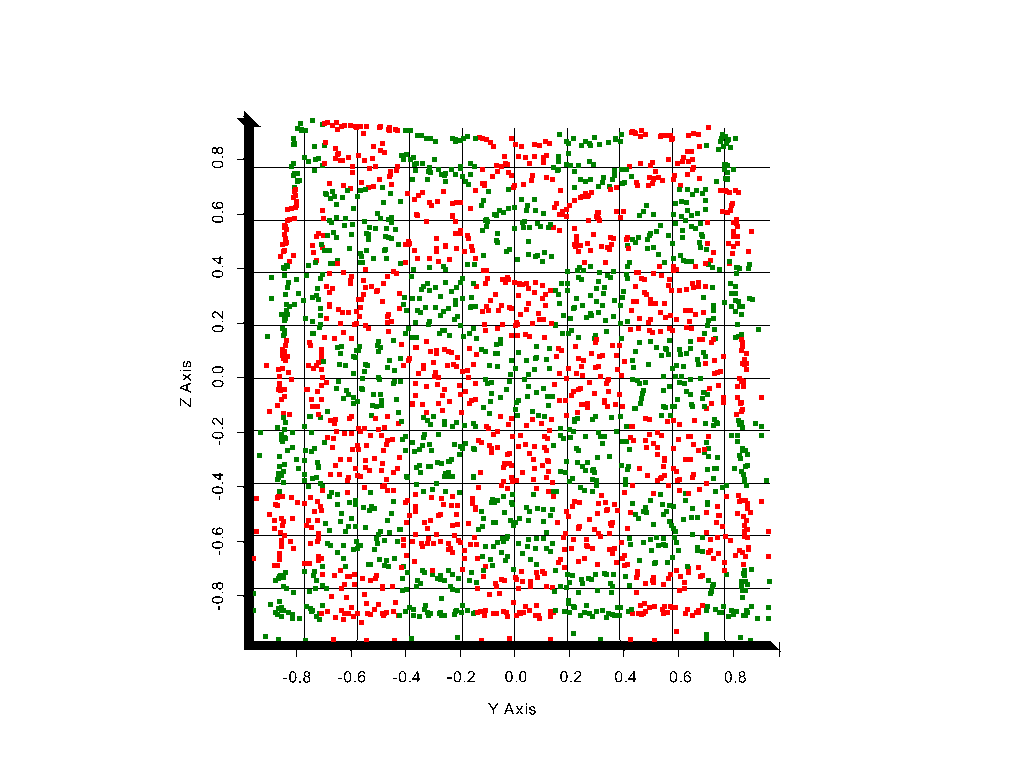

In [237]:
import cmocean
s_res = 7
p = pv.Plotter()
# p.add_mesh(mesh,color='blue', label='Input')
cmaps = cmocean.cm.algae
# print(cmaps.colors)
ii = 1

for j in np.arange(s_res):
    for k in np.arange(s_res):
        ii += 1
#         print(ii)
        colors = cmaps(ii*10)
#         print(colors)
        y = ((j/s_res)*2)-1
        z = ((k/s_res)*2)-1
        bounds = [0.8,1 , z,z+2/s_res, y,y+2/s_res]
        clipped = mesh.clip_box(bounds,invert=False)
        if  ii % 2  == 1:
            p.add_mesh(clipped, label='Clipped',color='red')
        else:
            p.add_mesh(clipped, label='Clipped',color='green')


p.show_grid()
p.show(cpos=[1,0,0])



In [238]:
# make 64 sensors and compute some stuff
ii = 0

for j in np.arange(s_res):
    for k in np.arange(s_res):
        ii +=1
        y = ((j/s_res)*2)-1
        z = ((k/s_res)*2)-1
        bounds = [0.8,1 , y,y+2/s_res, z,z+2/s_res]
        clipped = mesh.clip_box(bounds,invert=False)
        print(ii,(clipped['Vel-normed']**2).mean(),clipped['Vel-normed'].std(),clipped['Vel-normed'].size)




1 1.6261427 0.37152824 45
2 2.1984901 0.45497683 48
3 1.8018222 0.35380852 46
4 1.4347126 0.31328395 47
5 1.3673111 0.2733483 45
6 1.6892436 0.2462355 36
7 2.1882231 0.16578718 28
8 2.1236498 0.42109004 45
9 2.4490962 0.40244898 53
10 1.0164036 0.4041282 56
11 0.5676175 0.367362 52
12 0.9150167 0.39972168 49
13 1.1015218 0.4408397 59
14 2.261042 0.24242228 53
15 1.799566 0.39172387 50
16 1.0585505 0.32140738 56
17 1.1549155 0.40494362 56
18 0.18783078 0.15722442 51
19 0.20103692 0.17756075 57
20 0.42665228 0.28762224 46
21 1.4242151 0.34507024 44
22 1.8293899 0.4320565 50
23 0.67685246 0.3540907 57
24 0.35688055 0.26634282 55
25 0.21332851 0.17841582 47
26 0.20354544 0.18564212 52
27 0.61552346 0.24357067 44
28 1.5996634 0.30618945 41
29 2.031416 0.39660197 48
30 1.0426689 0.40481156 53
31 0.3768679 0.24218102 52
32 0.167941 0.17357731 51
33 0.29380044 0.23991892 55
34 0.63342106 0.28052917 51
35 1.9389573 0.27989063 43
36 2.4431512 0.39576098 47
37 1.6814228 0.3701178 51
38 0.8500792 

In [100]:
clipped['Vel'].mean(),clipped['Vel'].std(),clipped['Vel'].size

(0.077235974, 0.23970848, 75)

In [152]:
geom = pv.Arrow()  # This could be any dataset

# Perform the glyph
# mesh.set_active_scalar('Vel')


# mesh.set_active_vectors('Vel')

bounds = [-1,1 , -.1,.1 , -1,1]
# mesh2 = mesh.gaussian_smooth(std_dev=2.)
clipped2 = mesh.clip_box(bounds,invert=False)

glyphs = clipped2.glyph(orient="Vel",scale="Vel-normed", factor=0.1, geom=geom)

# plot using the plotting class
pv.set_plot_theme("document")

p = pv.Plotter()
p.add_mesh(glyphs,lighting=True)
# Set a cool camera position
# p.camera_position = [
#     (84.58052237950857, 77.76332116787425, 27.208569926456548),
#     (131.39486171068918, 99.871379394528, 20.082859824932008),
#     (0.13483731007732908, 0.033663777790747404, 0.9902957385932576),
# # ]
p.show_grid()
p.show(cpos=[0,1,0])

NameError: name 'x' is not defined

In [173]:
# can't seem to get stream lines working
# https://docs.pyvista.org/examples/01-filter/streamlines.html#sphx-glr-examples-01-filter-streamlines-py
mesh.set_active_scalars("Vel-normed")
mesh.set_active_vectors("Vel")
streamlines, src = mesh.streamlines(
    return_source=True,
    max_time=100.0,
    initial_step_length=0.01,
    terminal_speed=0.1,
    n_points=50,
    source_radius=0.1,
    source_center=(0,0,0),
)
# p = pv.Plotter()
# p.add_mesh(src.tube(radius=0.01), scalars="Vel-normed", lighting=False)
# p.show()
streamlines
# src


PolyData (0x7f29d5f5c8a0)
  N Cells:	0
  N Points:	0
  X Bounds:	1.000e+00, -1.000e+00
  Y Bounds:	1.000e+00, -1.000e+00
  Z Bounds:	1.000e+00, -1.000e+00
  N Arrays:	11

In [280]:
import sqlite3
conn = sqlite3.connect('res_6.db')

c = conn.cursor()

# # Create table
# c.execute('''CREATE TABLE stocks
#              (date text, trans text, symbol text, qty real, price real)''')

# Insert a row of data
# c.execute("INSERT INTO stocks VALUES ('2006-01-05','BUY','RHAT',100,35.14)")

# Save (commit) the changes
# conn.commit()

# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
# conn.close()

print(conn)

purchases = [('2006-03-28', 'BUY', 'IBM', 1000, 45.00),
             ('2006-04-05', 'BUY', 'MSFT', 1000, 72.00),
             ('2006-04-06', 'SELL', 'IBM', 500, 53.00),
            ]
c.executemany('INSERT INTO stocks VALUES (?,?,?,?,?)', purchases)
# print(c.fetchone())
for row in c.execute('SELECT * FROM stocks ORDER BY price'):
    print(row)

OperationalError: database is locked

('2006-01-05', 'BUY', 'RHAT', 100.0, 35.14)
('2006-03-28', 'BUY', 'IBM', 1000.0, 45.0)
('2006-03-28', 'BUY', 'IBM', 1000.0, 45.0)
('2006-03-28', 'BUY', 'IBM', 1000.0, 45.0)
('2006-04-06', 'SELL', 'IBM', 500.0, 53.0)
('2006-04-06', 'SELL', 'IBM', 500.0, 53.0)
('2006-04-06', 'SELL', 'IBM', 500.0, 53.0)
('2006-04-05', 'BUY', 'MSFT', 1000.0, 72.0)
('2006-04-05', 'BUY', 'MSFT', 1000.0, 72.0)
('2006-04-05', 'BUY', 'MSFT', 1000.0, 72.0)


('2006-01-05', 'BUY', 'RHAT', 100.0, 35.14)
('2006-03-28', 'BUY', 'IBM', 1000.0, 45.0)
('2006-03-28', 'BUY', 'IBM', 1000.0, 45.0)
('2006-04-06', 'SELL', 'IBM', 500.0, 53.0)
('2006-04-06', 'SELL', 'IBM', 500.0, 53.0)
('2006-04-05', 'BUY', 'MSFT', 1000.0, 72.0)
('2006-04-05', 'BUY', 'MSFT', 1000.0, 72.0)


In [ ]:
 # see if geo exits, check volume before running, can just report NaNs for that case


In [259]:
(1080*720)/((8**2)*6*4*8**3)


0.98876953125

In [267]:
# compute time calculation

# cases per design
faces = 6
corners = 8
edges = 12

cases = faces + edges + corners

time_per_case = 5 # minutes to compute and save

# designs
x_range = 10 - - 10 
y_range = x_range
z_range = x_range

designs = x_range**3

minutes_per_day = 60 * 24

designs * cases * time_per_case / minutes_per_day

#



722.2222222222222

In [60]:
channels = mesh.threshold([1.5,4])
bodies = channels.split_bodies()
# Now remove all bodies with a small volume
for key in bodies.keys():
    b = bodies[key]
    vol = b.volume
#     if vol < 1000.0:
#         del bodies[key]
#         continue
    # Now lets add a volume array to all blocks
    b.cell_arrays["TOTAL VOLUME"] = np.full(b.n_cells, vol)

KeyboardInterrupt: 

In [ ]:
bodies.plot(scalars="TOTAL VOLUME", cmap="viridis", show_grid=True)


In [4]:

pl = pv.PlotterITK()

# the below does not seem to be the right way to set for plotting
mesh.set_active_vectors('Press')



pl = pv.PlotterITK()

#plotting Press to a scalar(s) doesn't work either
pl.add_mesh(mesh, scalar = mesh['Press'],smooth_shading=True)
pl.show(True)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…